## Web Crawker that collects information on the Hyakumeisan

Information obatain from the excellent web site momonayama.net by Inpossi.

In [49]:
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup as bs
import string
import json
from matplotlib import path
import numpy as np
import matplotlib.pyplot as plt


In [194]:
def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None

def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)

def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)
    
#Conversion of lat-lon by sliders_alpha stackoverflow
def dms_convert(old):
    direction = {'N':1, 'S':-1, 'E': 1, 'W':-1}
    new = old.replace('°',' ').replace(u'′',' ').replace(u'″',' ')
    new = new.split()
    new_dir = new[-1]
    
    if len(new)<4:
         return []    
    new.extend([0,0,0])
    
    return (int(new[0])+int(new[1])/60.0+ float(new[2])/3600.0) * direction[new_dir]


In [3]:
#Information dowloaded from momonayama.net#
base_path = "https://www.momonayama.net/hundred_mt_individually_data/basic_data/basic_data"
hyakumeisan = []
for i in range(99):
    mount = {}
    raw_html = simple_get(base_path + '-' + str(i+1).zfill(3) + '.html')
    bs_html = bs(raw_html,'html.parser')
    # extract Name
    div = bs_html.findAll("div", {'class':'h2_main_title-01'})
    mount['Nam'] = ''.join(x for x in div[0].h2.text if x not in '\r\n\t')

    # extract Elevation
    div = bs_html.findAll("div", {'class':'bas_pro-01'})
    dms = ''.join(x for x in div[0].p.text if x not in '\r\n\t')
    st = dms.find('E')
    mount['Lat'] = [dms_convert(dms[0:st]), dms_convert(dms[st:])]

    # extract location
    div = bs_html.findAll("div", {'class':'bas_alt-01'})
    mount['Ele'] = ''.join(x for x in div[0].p.text if x not in '\r\n\t')

    # extract Area
    div = bs_html.findAll("div", {'class':'bas_add-01'})
    mount['Loc'] = ''.join(x for x in div[0].p.text if x not in '\r\n\t')
    print(i+1,mount['Nam'], mount['Ele'])
    mount['Eng'] = ''
    hyakumeisan.append(mount)

1 利尻岳（利尻山・利尻富士） 1719m
2 羅臼岳 1661m
3 斜里岳（オンネヌプリ） 1547m
4 阿寒岳（雄阿寒岳・雌阿寒岳） 1499m
5 大雪山（ヌタプカウシペ） 2291m
6 トムラウシ山 2141m
7 十勝岳 2077m
8 幌尻岳 2052m
9 後方羊蹄山 1893m
10 岩木山 1625m
11 八甲田山 1585m
12 八幡平 1613m
13 岩手山 2038m
14 早池峰山 1917m
15 鳥海山 2236m
16 月山 1980m
17 朝日連峰 1870m
18 蔵王山 1841m
19 飯豊連峰 2015m
20 吾妻山 2035m
21 安達太良山 1700m
22 磐梯山 1819m
23 会津駒ヶ岳 2132m
24 那須岳 1915m
25 筑波山 877m
26 燧ヶ岳 2356m
27 至仏山 2228m
28 武尊山 2158m
29 赤城山 1828m
30 男体山 2486m
31 日光白根山 2578m
32 皇海山 2144m
33 越後駒ヶ岳 2003m
34 平ヶ岳 2141m
35 巻機山 1967m
36 谷川岳 1963m
37 苗場山 2145m
38 雨飾山 1963m
39 妙高山 2454m
40 火打山 2462m
41 高妻山 2353m
42 草津白根山 2165m
43 四阿山 2354m
44 浅間山 2568m
45 両神山 1723m
46 甲武信岳 2475m
47 金峰山 2595m
48 瑞牆山 2230m
49 雲取山 2017m
50 大菩薩嶺 2057m
51 丹沢 1567m
52 富士山 3776m
53 天城山 1406m
54 白馬岳 2932m
55 五竜岳 2814m
56 鹿島槍ヶ岳 2890m
57 剱岳 2999m
58 立山 3015m
59 薬師岳 2926m
60 黒部五郎岳 2840m
61 水晶岳 2978m
62 鷲羽岳 2924m
63 槍ヶ岳 3180m
64 穂高岳 3190m
65 常念岳 2857m
66 笠ヶ岳 2897m
67 焼岳 2444m
68 乗鞍岳 3026m
69 美ヶ原 2034m
70 霧ヶ峰 1925m
71 蓼科山 2530m
72 八ヶ岳 2899m
73 御嶽山 3067m
74 

In [4]:
with open('data-Hyakumeisan.json', 'w') as json_file:
  json.dump(hyakumeisan, json_file, ensure_ascii=False)

Open json file nad match japanese name with English name from the wikipedia

In [9]:
input_file = open ('data-Hyakumeisan.json')
hyakumeisan = json.load(input_file)

In [6]:
wiki = simple_get('https://en.wikipedia.org/wiki/100_Famous_Japanese_Mountains')
wiki_html = bs(wiki,'html.parser')


In [195]:
names = {}
div = wiki_html.findAll("div", {'id':'bodyContent'})
for l in div[0].findAll("li"):
    if l.text.startswith("Mount "):
        st = l.text.find("(")
        names[l.text[st+1:l.text.find(")")]]=l.text[0:st-1]
        tail = 'https://en.wikipedia.org/wiki/' + l.text[0:st-1].replace(' ','_')
        print(tail)
        wiki_mt = simple_get(tail)
        if wiki_mt != None:
            wiki_mt_html = bs(wiki_mt,'html.parser')
            lat = wiki_mt_html.findAll("span", {'class':'latitude'})
            lon = wiki_mt_html.findAll("span", {'class':'longitude'})
            if len(lat) >= 1:
                lat = dms_convert(lat[0].text)
            if len(lon) >= 1:
                lon = dms_convert(lon[0].text)
            print(lat, lon)
            names[l.text[0:st-1] + 'Lat'] = [lat, lon]

https://en.wikipedia.org/wiki/Mount_Poroshiri
42.71944444444445 142.68277777777777
https://en.wikipedia.org/wiki/Mount_Rausu
44.075833333333335 145.1225
https://en.wikipedia.org/wiki/Mount_Rishiri
45.18 141.23916666666665
https://en.wikipedia.org/wiki/Mount_Shari
43.76555555555556 144.71805555555557
https://en.wikipedia.org/wiki/Mount_Tokachi
[] []
https://en.wikipedia.org/wiki/Mount_Tomuraushi
[] []
https://en.wikipedia.org/wiki/Mount_Yōtei
42.82666666666667 140.8113888888889
https://en.wikipedia.org/wiki/Mount_Adatara
37.64416666666666 140.2861111111111
https://en.wikipedia.org/wiki/Mount_Aizu-Komagatake
37.04761111111111 139.35377777777776
https://en.wikipedia.org/wiki/Mount_Asahi
[] []
https://en.wikipedia.org/wiki/Mount_Azuma
37.72222222222222 140.26361111111112
https://en.wikipedia.org/wiki/Mount_Bandai
37.59805555555556 140.07555555555555
https://en.wikipedia.org/wiki/Mount_Chōkai
39.09916666666667 140.04888888888888
https://en.wikipedia.org/wiki/Mount_Gassan
38.54888888888889 1

In [196]:
for m in hyakumeisan:
    m['Eng'] = names.get(m['Nam'])

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

## Update geo json file to include mountains

In [2]:
input_file = open ('nihon.geo.json')
nihon = json.load(input_file)

{'nam': 'Nagano Ken', 'nam_ja': '長野県', 'id': 20}


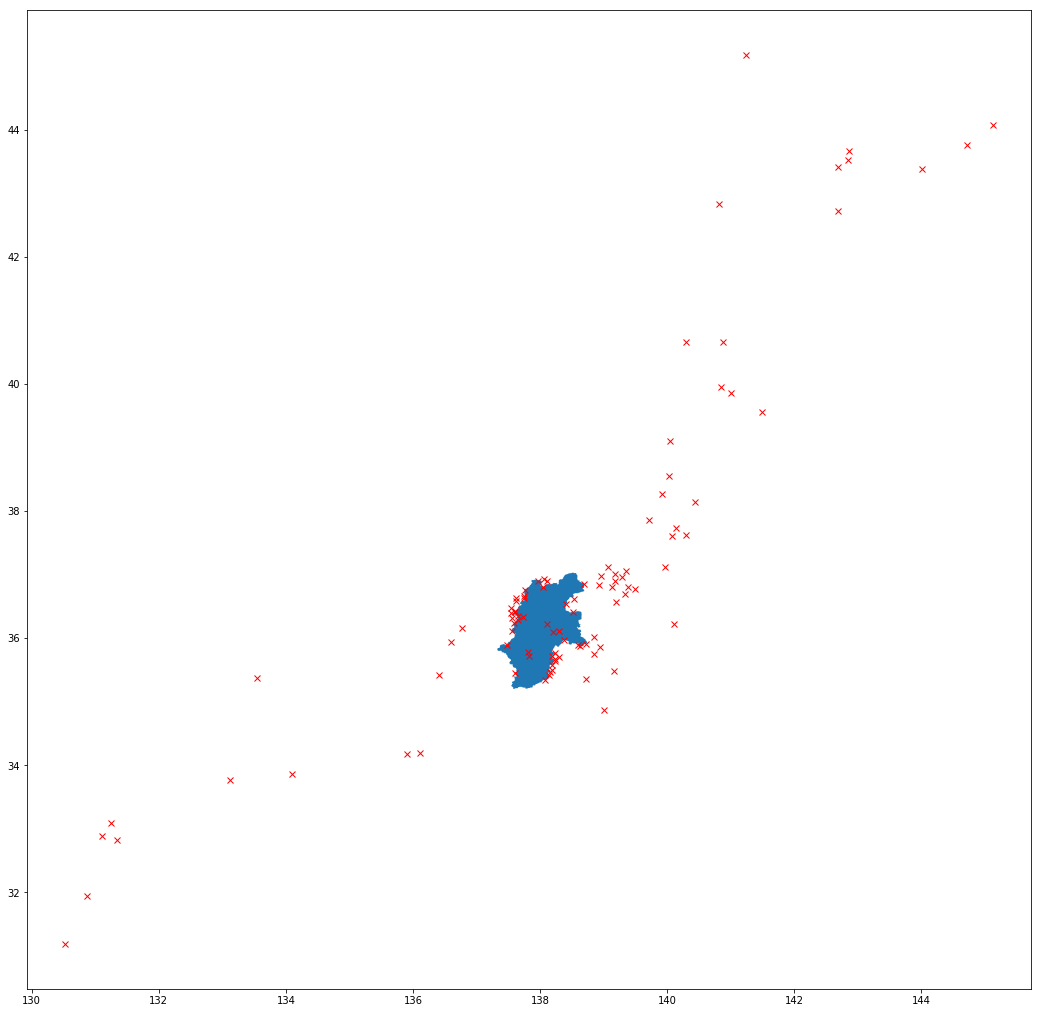

In [202]:
# for p in nihon["features"][0]["geometry"]["coordinates"]:
#     path.Path(p[0])
print(nihon["features"][22]["properties"])    
p=nihon["features"][22]["geometry"]["coordinates"]
x = np.transpose(p[0])[0]
y = np.transpose(p[0])[1]

plt.figure(figsize=(18, 18))
plt.axis('equal')
plt.fill(x,y)

for m in hyakumeisan:
    xm = m['Lat'][1]
    ym = m['Lat'][0]
    pref_path = path.Path(p[0])
    contains = pref_path.contains_point(hyakumeisan[mt]['Lat'])
    plt.plot(xm,ym,'rx')


plt.show()